Collate data and then map global trends

整理数据，然后绘制全球趋势图

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import myfunction as mf
path_data_raw = "C:/Users/dell/OneDrive/file/"
path_country_nc = "C:/Users/dell/OneDrive/file/nc"
path_country_csv = "C:/Users/dell/OneDrive/file/csv/"
path_one_spdb = 'C:/Users/dell/OneDrive/file/SPDB/'
drive_letter = 'E:'

path_pre = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/pretreatment/"
path_match = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/match/"
path_semdata = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/semdata/"


path_2_preanalysis_data = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part2_sem/preanalysis/"
path_2_preanalysis_fig = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part2_sem/preanalysis/"


path_3_sw_forecast = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/sw_forecast/"
path_temp = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/temp/"

path_1_describe_fig_fish = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part1_describe/fish_diff/"
path_1_describe_global_map = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part1_describe/global_map/"

path_1_describe = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part1_describe/"


path_ng_fig = drive_letter + "/wyy/code_project/running_outcome/final_fig/ng_fig/"


mark_num = "25"
meta_name = "meta_data.csv"

list_pfas =['PFOA', 'PFNA', 'PFDA', 'PFUnDA','PFDoDA','PFTrDA', 'PFTeDA', 'PFHxS', 'PFOS', 'FOSA', 'PFBA', 'PFPeA', 'PFHxA', 'PFHpA','PFBS']
list_pfas_lc = ['PFOA', 'PFNA', 'PFDA', 'PFUnDA','PFDoDA','PFTrDA', 'PFTeDA', 'PFHxS', 'PFOS', 'FOSA']
list_pfas_sc = ['PFBA', 'PFPeA', 'PFHxA', 'PFHpA','PFBS']
list_color = ["#4d8cbf", "#4f9c8b", "#555c6c", "#d77563", "#7d84a8", "#84aeb8", "#c3473b", "#89756d","#ffb3cc","#9a7ebf","#ffddb8", "#c4eaff", "#d1c6ff", "#c2ffbf", "#f5f5b0"]


dic_color = dict(zip(list_pfas,list_color))

### Data Collation-1

In [2]:
import os
import pandas as pd

def merge_year_one(folder_path, str_y='value', max_year=2021):
    """
    Combine the data Calculate the slope
    ---
    合并数据 计算斜率
    """
    def merge_year_one1(folder_path, str_y='value'):
        """Combine the data"""
        all_data = pd.DataFrame()
        for filename in os.listdir(folder_path):
            if filename.endswith('.csv'):
                year = filename.split('_')[1].split('.')[0]
                file_path = os.path.join(folder_path, filename)
                df = pd.read_csv(file_path)
                df = df[['lon_grid', 'lat_grid',str_y]]
                df = df.rename(columns={str_y: year})
                if all_data.empty:
                    all_data = df
                else:
                    all_data = pd.merge(all_data, df, on=['lon_grid', 'lat_grid'], how='outer')
            else:
                pass
        return all_data


    years = [str(i) for i in range(2000, max_year)]


    def calculate_slope(row):
        """
        Calculate the slope
        ---
        计算斜率
        """
        y = row.dropna().values
        x = np.array(years)[:len(y)].astype(int)

        if len(x) < 2:
            return np.nan

        slope, intercept = np.polyfit(x, y, 1)
        
        return slope
    all_data = merge_year_one1(folder_path, str_y)
    print(all_data.columns)

    all_data['slope'] = all_data[years].apply(calculate_slope, axis=1)
    all_data['value'] = all_data[years].mean(axis=1)
    return all_data


In [3]:
sw_folder_path = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/sw_forecast/s7_rf_output/only_year_mean/'
sw_path_year = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/sw_forecast/s7_rf_output/final_file/'
df_year_data = merge_year_one(sw_folder_path,'value')
df_year_data.to_csv(sw_path_year + 'sw_year.csv',index=False)

df_year_data_lc = merge_year_one(sw_folder_path,'lc_value')
df_year_data_lc.to_csv(sw_path_year + 'sw_lc_year.csv',index=False)

df_year_data_sc = merge_year_one(sw_folder_path,'sc_value')
df_year_data_sc.to_csv(sw_path_year + 'sw_sc_year.csv',index=False)

Index(['lon_grid', 'lat_grid', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')
Index(['lon_grid', 'lat_grid', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')
Index(['lon_grid', 'lat_grid', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')


In [4]:
lr_folder_path = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/lr_forecast/s7_rf_output/only_year_mean/'
lr_path_year = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/lr_forecast/s7_rf_output/final_file/'
df_year_data = merge_year_one(lr_folder_path,'value')
df_year_data.to_csv(lr_path_year + 'lr_year.csv',index=False)

df_year_data_lc = merge_year_one(lr_folder_path,'lc_value')
df_year_data_lc.to_csv(lr_path_year + 'lr_lc_year.csv',index=False)

df_year_data_sc = merge_year_one(lr_folder_path,'sc_value')
df_year_data_sc.to_csv(lr_path_year + 'lr_sc_year.csv',index=False)

Index(['lon_grid', 'lat_grid', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')
Index(['lon_grid', 'lat_grid', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')
Index(['lon_grid', 'lat_grid', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')


### Visualisation


In [5]:
import os
import pandas as pd
from netCDF4 import Dataset
import numpy as np

def change_to_nc(path_new_file, data_type, str_colname='value'):
    """
    Data conversion to nc format files
    ---
    数据转换为nc格式文件
    """
    name_new_file = f'{data_type}_year_{str_colname}.nc'
    df = pd.read_csv(path_new_file + data_type + '_year.csv')
    df = df[['lon_grid', 'lat_grid', str_colname]]
    nc_file = Dataset(path_new_file + name_new_file, 'w', format='NETCDF4')

    lon = np.arange(-180, 180, 1)
    lat = np.arange(-90, 90, 1)
    nc_file.createDimension('lon', len(lon))
    nc_file.createDimension('lat', len(lat))
    lon_var = nc_file.createVariable('lon', 'f4', 'lon')
    lat_var = nc_file.createVariable('lat', 'f4', 'lat')
    lon_var[:] = lon
    lat_var[:] = lat
    value_var = nc_file.createVariable(str_colname, 'f4', ('lat', 'lon'))
    value_data = np.full((len(lat), len(lon)), np.nan)
    for index, row in df.iterrows():
        if row['lon_grid'] != -180 and row['lon_grid'] != 180 and row['lat_grid'] != -90 and row['lat_grid'] != 90:
            value_data[int(row['lat_grid'] + 90), int(row['lon_grid'] + 180)] = row[str_colname]
    value_var[:, :] = value_data
    nc_file.close()
    return print('over')


In [6]:
path_nf = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/sw_forecast/s7_rf_output/final_file/'

for str_colname in ['slope', 'value']:
    data_type1 = 'sw'
    data_type2 = 'sw_lc'
    data_type3 = 'sw_sc'
    change_to_nc(path_nf, data_type1, str_colname)
    change_to_nc(path_nf, data_type2, str_colname)
    change_to_nc(path_nf, data_type3, str_colname)

over
over
over
over
over
over


In [7]:
path_nf = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/lr_forecast/s7_rf_output/final_file/'
for str_colname in ['slope', 'value']:
    data_type1 = 'lr'
    data_type2 = 'lr_lc'
    data_type3 = 'lr_sc'
    change_to_nc(path_nf, data_type1, str_colname)
    change_to_nc(path_nf, data_type2, str_colname)
    change_to_nc(path_nf, data_type3, str_colname)

over
over
over
over
over
over


### Data Collation-2

In [8]:
import os
import pandas as pd

def merge_year_file(folder_path, output_file_path):
    """
    Consolidation of data by year
    ---
    按年份合并数据
    """
    file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    combined_data = pd.DataFrame()
    for file in file_list:
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)
        data['year'] = file[3:7]
        combined_data = pd.concat([combined_data, data], ignore_index=True)
    print(combined_data.columns)
    df_country_id = pd.read_csv(path_country_csv + 'country_id.csv')
    df_country_id = df_country_id.rename(columns={'lon':'lon_grid', 'lat':'lat_grid'})
    df_country = pd.read_csv(path_country_csv + 'country.csv')
    df_country = df_country[['region','country_id']]
    combined_data = pd.merge(combined_data, df_country_id, on=['lon_grid', 'lat_grid'], how='left')

    combined_data = pd.merge(combined_data, df_country, on='country_id', how='left')
    combined_data.to_csv(output_file_path, index=False)

    return print("CSV save to:", output_file_path)


In [9]:
sw_folder_path = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\sw_forecast\s7_rf_output\only_year_mean'
sw_output_file_path = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\sw_forecast\s7_rf_output\final_file\sw.csv'
merge_year_file(sw_folder_path, sw_output_file_path)

Index(['lon_grid', 'lat_grid', 'PFOA', 'PFNA', 'PFDA', 'PFUnDA', 'PFDoDA',
       'PFTrDA', 'PFTeDA', 'PFHxS', 'PFOS', 'FOSA', 'PFBA', 'PFPeA', 'PFHxA',
       'PFHpA', 'PFBS', 'value', 'lc_value', 'sc_value', 'year'],
      dtype='object')
CSV文件合并完成，并保存为： E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\sw_forecast\s7_rf_output\final_file\sw.csv


In [10]:
lr_folder_path = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\lr_forecast\s7_rf_output\only_year_mean'
lr_output_file_path = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\lr_forecast\s7_rf_output\final_file\lr.csv'
merge_year_file(lr_folder_path, lr_output_file_path)

Index(['lon_grid', 'lat_grid', 'PFOA', 'PFNA', 'PFDA', 'PFUnDA', 'PFDoDA',
       'PFTrDA', 'PFTeDA', 'PFHxS', 'PFOS', 'FOSA', 'PFBA', 'PFPeA', 'PFHxA',
       'PFHpA', 'PFBS', 'value', 'lc_value', 'sc_value', 'year'],
      dtype='object')
CSV文件合并完成，并保存为： E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\lr_forecast\s7_rf_output\final_file\lr.csv


### Data Collation-3

In [11]:
df_country_id = pd.read_csv(path_country_csv + 'country_id.csv')
df_country = pd.read_csv(path_country_csv + 'country.csv')

def re_merge_data(df, df_country_id, df_country):
    """
    Consolidation of data
    ---
    合并数据
    """
    sw_combined_data = df.copy()
    sw_combined_data_lc = sw_combined_data[['lon_grid','lat_grid','lc_value','year']]
    sw_combined_data_lc['type'] = 'LC-PFAS'
    sw_combined_data_lc = sw_combined_data_lc.rename(columns={'lc_value':'value'})
    sw_combined_data_sc = sw_combined_data[['lon_grid','lat_grid','sc_value','year']]
    sw_combined_data_sc['type'] = 'SC-PFAS'
    sw_combined_data_sc = sw_combined_data_sc.rename(columns={'sc_value':'value'})
    df_merge = pd.concat([sw_combined_data_lc, sw_combined_data_sc],axis=0)
    print(df_merge.shape)
    df_country_id = df_country_id.rename(columns={'lon':'lon_grid', 'lat':'lat_grid'})
    df_country = df_country[['region','country_id']]
    combined_data = pd.merge(df_merge, df_country_id, on=['lon_grid', 'lat_grid'], how='left')
    combined_data = pd.merge(combined_data, df_country, on='country_id', how='left')
    print(combined_data.columns)
    return combined_data



In [12]:
sw_output_file_path = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\sw_forecast\s7_rf_output\final_file\sw.csv'
sw_combined_data = pd.read_csv(sw_output_file_path)
combined_data = re_merge_data(sw_combined_data, df_country_id, df_country)
combined_data.to_csv(r'E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\sw_forecast\s7_rf_output\final_file\sw_merge.csv',index=False)

C:\Users\dell\AppData\Local\Temp\ipykernel_23756\2156918762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_combined_data_lc['type'] = 'LC-PFAS'
C:\Users\dell\AppData\Local\Temp\ipykernel_23756\2156918762.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_combined_data_sc['type'] = 'SC-PFAS'


(2223984, 5)
Index(['lon_grid', 'lat_grid', 'value', 'year', 'type', 'country_id',
       'region'],
      dtype='object')


In [13]:
lr_output_file_path = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\lr_forecast\s7_rf_output\final_file\lr.csv'
lr_combined_data = pd.read_csv(lr_output_file_path)
combined_data = re_merge_data(lr_combined_data, df_country_id, df_country)
combined_data.to_csv(r'E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\lr_forecast\s7_rf_output\final_file\lr_merge.csv',index=False)

C:\Users\dell\AppData\Local\Temp\ipykernel_23756\2156918762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_combined_data_lc['type'] = 'LC-PFAS'
C:\Users\dell\AppData\Local\Temp\ipykernel_23756\2156918762.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_combined_data_sc['type'] = 'SC-PFAS'


(2223984, 5)
Index(['lon_grid', 'lat_grid', 'value', 'year', 'type', 'country_id',
       'region'],
      dtype='object')


### Fig lc-sc

In [2]:
# def
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


def draw_year_lm(df, path_save, int_max_y=20, str_unit='ng/l'):
    """
    Plotting linear regression
    ---
    绘制线性回归图
    """
    sns.set_theme(style="ticks")
    df_hem_line = df.copy()
    x = "year"
    y = "value"
    hue = "type"
    order = ["LC-PFAS", 'SC-PFAS']
    color_select = ["#e76361", "#808dae"]
    palette = {"LC-PFAS": "#4f9c8b", "SC-PFAS": "#4d8cbf"}
    ax = sns.lmplot(
        data=df_hem_line,
        x=x, y=y, hue=hue,
        height=5,
        palette=palette,legend=False, scatter=False,
        ci=95,
    )
    ax.set(ylim=(0,int_max_y))

    plt.xlabel('', fontsize=18)
    plt.ylabel("", fontsize=18)

    ax1 = ax.axes[0,0]
    df_hum_data1 = df_hem_line[df_hem_line[hue]==order[1]]
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_hum_data1[x], df_hum_data1[y])
    reg_eq = "y = {:.4f}x + {:.4f}".format(slope, intercept)
    annot = "{}\np = {:.2e}\n{}".format(order[1], p_value, reg_eq)  
    ax1.annotate(annot, xy=(0.58, 0.99), xycoords="axes fraction",
                        fontsize=12, ha="left", va="top")

    ax2 = ax.axes[0,0]
    df_hum_data2 = df_hem_line[df_hem_line[hue]==order[0]]
    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(df_hum_data2[x], df_hum_data2[y])
    reg_eq2 = "y = {:.4f}x + {:.4f}".format(slope2, intercept2)
    annot2 = "{}\np = {:.2e}\n{}".format(order[0], p_value2, reg_eq2)  # 修改此处
    ax2.annotate(annot2, xy=(0.05, 0.99), xycoords="axes fraction",
                        fontsize=12, ha="left", va="top")

    plt.gcf().set_size_inches(5, 3)
    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    if isinstance(palette, dict):
        line_handles = [plt.Line2D([0], [0], color=palette[label], lw=2) for label in labels]
    else:
        line_handles = [plt.Line2D([0], [0], color=color, lw=2) for color in palette[:len(labels)]]
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.subplots_adjust(left=0.15,right=0.95,bottom=0.15,top=0.7)
    plt.savefig(path_save, dpi = 180)
    plt.show()
    return print('okk')

def draw_year_line(data, path_save, int_max_y=20,  str_unit='ng/l'):
    """
    Plotting line graphs
    ---
    绘制折线图
    """
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    fig, ax = plt.subplots()
    plt.gcf().set_size_inches(5, 3)
    sns.lineplot(x="year", y="value", data=data, color="#555c6c", label="Sum-PFAS", marker='D', legend=False)
    sns.lineplot(x="year", y="lc_value", data=data, color="#4f9c8b", label="LC-PFAS", marker='D', legend=False)
    sns.lineplot(x="year", y="sc_value", data=data, color="#4d8cbf", label="SC-PFAS", marker='D', legend=False)

    ax.set(ylim=(0,int_max_y))
    plt.xlabel("", fontsize=18)
    plt.ylabel("", fontsize=18)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

    plt.subplots_adjust(left=0.15,right=0.95,bottom=0.15,top=0.7)
    plt.savefig(path_save, dpi = 300)
    return 'okk'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
combined_data = pd.read_csv(r'E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\sw_forecast\s7_rf_output\final_file\sw_merge.csv')
sw_output_file_path = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\sw_forecast\s7_rf_output\final_file\sw.csv'
sw_combined_data = pd.read_csv(sw_output_file_path)
path_1_describe_global_map_sw = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part1_describe/global_map/sw/"
palette_colors = {"LC-PFAS": "#4f9c8b", "SC-PFAS": "#4d8cbf"}
list_regin = combined_data['region'].unique().tolist()
print(list_regin, len(list_regin))
# Overall global trends
# 全球总趋势
path_save_line = path_ng_fig +  'fig5_sw_line.svg'
path_save_lm = path_ng_fig +  'fig5_sw_lm.svg'
draw_year_lm(combined_data, path_save_lm, 10, 'ng/g')
draw_year_line(sw_combined_data, path_save_line, 10,'ng/g')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
combined_data = pd.read_csv(r'E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\lr_forecast\s7_rf_output\final_file\lr_merge.csv')
lr_output_file_path = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part3_forecast\lr_forecast\s7_rf_output\final_file\lr.csv'
# sw_path_save = path_1_describe_global_map + "fig5_sw_g.png"
lr_combined_data = pd.read_csv(lr_output_file_path)
path_1_describe_global_map_lr = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part1_describe/global_map/lr/"
palette_colors = {"LC-PFAS": "#4f9c8b", "SC-PFAS": "#4d8cbf"}
list_regin = combined_data['region'].unique().tolist()
print(list_regin, len(list_regin))
# Overall global trends
# 全球总趋势
path_save_line = path_ng_fig +  'fig5_lr_line.svg'
path_save_lm = path_ng_fig +  'fig5_lr_lm.svg'
draw_year_lm(combined_data, path_save_lm, 10, 'ng/g')
draw_year_line(lr_combined_data, path_save_line, 10,'ng/g')

### Fig global 

In [2]:
import os
import pandas as pd
# Calculation of calendar year averages
# 计算历年平均值
path = "E:\\wyy\\code_project\\running_outcome\\final_data\\SPDB\\part3_forecast\\sw_forecast\\\s7_rf_output\\only_year_mean"
list_pfas_merge = ['PFOA', 'PFNA', 'PFDA', 'PFUnDA','PFDoDA','PFTrDA', 'PFTeDA', 'PFHxS', 'PFOS', 'FOSA', 'PFBA', 'PFPeA', 'PFHxA', 'PFHpA','PFBS']
path_1_describe_global_map_sw = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part1_describe/global_map/sw/"
list_pfas_merge.append('year')
df_merge = pd.DataFrame(columns=list_pfas_merge)
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        file_path = os.path.join(path, filename)
        df = pd.read_csv(file_path, usecols=list_pfas_merge[:-1])
        mean_values = df.mean()
        df_temp = pd.DataFrame(mean_values).transpose()
        df_temp['year'] = filename[3:7]
        df_merge = pd.concat([df_merge, df_temp])
df_merge.reset_index(drop=True, inplace=True)
print(df_merge.head())

       PFOA      PFNA      PFDA    PFUnDA    PFDoDA    PFTrDA    PFTeDA  \
0  0.507128  0.094146  0.084703  0.030739  0.025621  0.027628  0.026085   
1  0.429116  0.100617  0.094209  0.033612  0.028197  0.030481  0.028857   
2  0.429641  0.097147  0.094073   0.03347  0.027969    0.0303  0.028563   
3  0.401505  0.089354  0.081701  0.030169  0.025273  0.027342  0.025847   
4  0.426979  0.091424  0.085379  0.028096  0.023861  0.025986  0.024856   

      PFHxS      PFOS      FOSA      PFBA     PFPeA     PFHxA     PFHpA  \
0  0.118724  0.407077  0.039475  0.294448   0.24662  0.250686  0.192453   
1  0.116875  0.361833  0.042068  0.284477  0.238641   0.23948  0.189623   
2  0.109979   0.34518  0.040535  0.283423   0.23421  0.231704  0.182355   
3   0.10946  0.335283  0.038501  0.270369  0.220691  0.219824  0.171381   
4  0.114683  0.363635  0.041387     0.286  0.230815  0.229819   0.18055   

       PFBS  year  
0  0.157964  2000  
1  0.154054  2001  
2  0.151161  2002  
3  0.145045  2003 

In [4]:
# View data in general
# 查看数据大致情况
df_merge_sum = df_merge.copy()
df_merge_sum['sum'] = df_merge[list_pfas].sum(axis=1)

df_merge_sum['per_PFOA']=df_merge_sum['PFOA']/df_merge_sum['sum']
mean_per_PFOS = df_merge_sum['per_PFOA'].mean()
median_per_PFOS = df_merge_sum['per_PFOA'].median()
max_per_PFOS = df_merge_sum['per_PFOA'].max()
min_per_PFOS = df_merge_sum['per_PFOA'].min()
std_per_PFOS = df_merge_sum['per_PFOA'].std()

print(f"Mean: {mean_per_PFOS}")
print(f"Median: {median_per_PFOS}")
print(f"Max: {max_per_PFOS}")
print(f"Min: {min_per_PFOS}")
print(f"Standard Deviation: {std_per_PFOS}")

df_merge_sum['sum_lc'] = df_merge_sum[list_pfas_lc].sum(axis=1)
df_merge_sum['sum_sc'] = df_merge_sum[list_pfas_sc].sum(axis=1)
df_merge_sum['per_lc'] = df_merge_sum['sum_lc'] / df_merge_sum['sum']
df_merge_sum['per_sc'] = df_merge_sum['sum_sc'] / df_merge_sum['sum']

mean_per_lc = df_merge_sum['per_lc'].mean()
median_per_lc = df_merge_sum['per_lc'].median()
max_per_lc = df_merge_sum['per_lc'].max()
min_per_lc = df_merge_sum['per_lc'].min()
std_per_lc = df_merge_sum['per_lc'].std()

mean_per_sc = df_merge_sum['per_sc'].mean()
median_per_sc = df_merge_sum['per_sc'].median()
max_per_sc = df_merge_sum['per_sc'].max()
min_per_sc = df_merge_sum['per_sc'].min()
std_per_sc = df_merge_sum['per_sc'].std()

print("\nLong-chain PFAS:")
print(f"Mean: {mean_per_lc}")
print(f"Median: {median_per_lc}")
print(f"Max: {max_per_lc}")
print(f"Min: {min_per_lc}")
print(f"Standard Deviation: {std_per_lc}")

print("\nShort-chain PFAS:")
print(f"Mean: {mean_per_sc}")
print(f"Median: {median_per_sc}")
print(f"Max: {max_per_sc}")
print(f"Min: {min_per_sc}")
print(f"Standard Deviation: {std_per_sc}")

df_merge_sum.to_csv(path_1_describe + 'water_year.csv')

Mean: 0.19112208970510444
Median: 0.1897329510678513
Max: 0.2206597837091824
Min: 0.17103761162136488
Standard Deviation: 0.011347009893292634

Long-chain PFAS:
Mean: 0.505459338584066
Median: 0.5311203145886048
Max: 0.5503412499171726
Min: 0.44730699251378336
Standard Deviation: 0.03926918495462842

Short-chain PFAS:
Mean: 0.49454066141593406
Median: 0.4688796854113951
Max: 0.5526930074862166
Min: 0.44965875008282724
Standard Deviation: 0.03926918495462846


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
def draw_year_gpfas(df_merge, path_save, mark_str, max_y):
    """
    Mapping the stack
    ---
    绘制堆积图
    """
    df_test5 = df_merge.copy()
    if mark_str == 'sw':
        str_unit = 'ng/l'
    if mark_str == 'lr':
        str_unit = 'ng/g'
    df_test5[["year"]] = df_test5[["year"]].astype(float)
    df_test5[["year"]] = df_test5[["year"]].astype(int)
    df_test5 = df_test5.set_index("year")
    df_merge_copy_td_po = df_merge.copy()
    df_merge_copy_od = mf.two_to_one(df_merge_copy_td_po, ['year'])

    df_test5_tb2 = mf.one_to_two(df_merge_copy_od, ['po_name'], 'year')
    df_test5_tb2["color"] = df_test5_tb2["po_name"].map(dic_color)
    df_test5_tb2 = df_test5_tb2.drop(columns=['po_name'])
    df_test5_tb2["sum"] = df_test5_tb2[[str(year) for year in range(2000, 2021)]].sum(axis=1)
    df_test5_tb2 = df_test5_tb2.sort_values(by=("sum"),ascending=False)
    # 根据sum的值排序，使得绘制的图，面积最大的在最下面
    # Sort the plots according to the value of sum so that the one with the largest area is at the bottom.
    list_po_need = list(df_test5_tb2.index)
    list_clolor_need = list(df_test5_tb2["color"])
    year = list(df_test5.index)
    df_test5 = df_test5[list_po_need]
    dic_data = df_test5.to_dict("list")

    fig, ax = plt.subplots()
    sns.set_theme(style="ticks")
    ax.stackplot(year, dic_data.values(),
                labels=dic_data.keys(), alpha=0.9,colors=list_clolor_need)
    ax.set_xlabel('', fontsize=18)
    ax.set_ylabel(f'PFAS Concentration({str_unit})', fontsize=18)
    ax.set(ylim=(0,max_y))
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16, rotation=90)
    ax.figure.set_size_inches(12,4)
    plt.grid(axis="x")
    ax.xaxis.set_ticks(np.arange(min(year), max(year)+1, 1))
    ax.xaxis.set_ticklabels(np.arange(min(year), max(year)+1, 1))
    plt.legend(bbox_to_anchor=(1.01, -0.1), loc=3,borderaxespad=0)

    plt.subplots_adjust(left=0.1,right=0.85,bottom=0.2,top=0.95)
    plt.savefig(path_save + "fig2_"+mark_str+"_global_stack.svg", dpi = 300)
    plt.show()
    return 'okk'

PFASs Concentration(ng/g)
PFASs Concentration(ng/l)

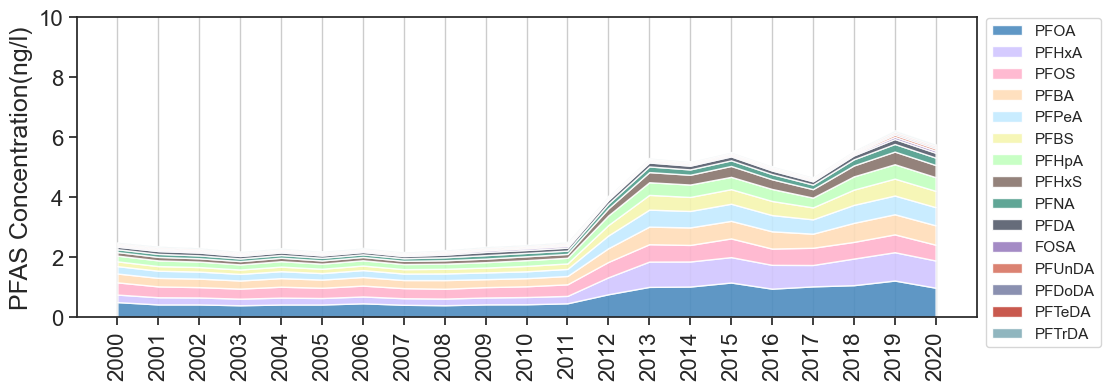

'okk'

In [17]:
draw_year_gpfas(df_merge, path_ng_fig,'sw', 10)

In [5]:
import os
import pandas as pd
# Calculation of calendar year averages
# 计算历年平均值
path = "E:\\wyy\\code_project\\running_outcome\\final_data\\SPDB\\part3_forecast\\lr_forecast\\s7_rf_output\\only_year_mean"
list_pfas_merge = ['PFOA', 'PFNA', 'PFDA', 'PFUnDA','PFDoDA','PFTrDA', 'PFTeDA', 'PFHxS', 'PFOS', 'FOSA', 'PFBA', 'PFPeA', 'PFHxA', 'PFHpA','PFBS']
list_pfas_merge.append('year')
df_merge_lr = pd.DataFrame(columns=list_pfas_merge)
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        file_path = os.path.join(path, filename)
        df = pd.read_csv(file_path, usecols=list_pfas_merge[:-1])
        mean_values = df.mean()
        df_temp = pd.DataFrame(mean_values).transpose()
        df_temp['year'] = filename[3:7]
        df_merge_lr = pd.concat([df_merge_lr, df_temp])
df_merge_lr.reset_index(drop=True, inplace=True)
print(df_merge_lr.head())




       PFOA      PFNA      PFDA    PFUnDA    PFDoDA    PFTrDA    PFTeDA  \
0  0.157576  0.116244   0.42011  0.552868  0.261083  0.444996  0.119475   
1  0.111044  0.099351  0.420862   0.55374  0.265424  0.449758  0.114314   
2  0.110072   0.09836  0.429154  0.564759  0.270839   0.46145  0.113755   
3  0.116636  0.099541  0.436404  0.572266  0.273222  0.467584  0.116753   
4  0.116258  0.101639  0.430843  0.567646  0.263696  0.460157  0.110452   

      PFHxS      PFOS      FOSA      PFBA     PFPeA     PFHxA     PFHpA  \
0  0.090865  2.431228  0.122544  0.046706  0.081066  0.060797  0.048585   
1  0.066441  2.312215  0.098546   0.04742  0.081872  0.061312  0.049017   
2  0.067312  2.279846  0.099087  0.047156  0.081089  0.060782  0.048869   
3  0.068435  2.309844  0.100601  0.047935  0.082328  0.061201  0.049152   
4  0.070216  2.351403  0.103159  0.047834  0.082073  0.060978  0.049076   

       PFBS  year  
0  0.052795  2000  
1  0.053821  2001  
2  0.053377  2002  
3  0.053977  2003 

In [6]:
# View data in general
# 查看数据大致情况

df_merge_sum = df_merge_lr.copy()
df_merge_sum['sum'] = df_merge_sum[list_pfas].sum(axis=1)

df_merge_sum['per_PFOS']=df_merge_sum['PFOS']/df_merge_sum['sum']
mean_per_PFOS = df_merge_sum['per_PFOS'].mean()
median_per_PFOS = df_merge_sum['per_PFOS'].median()
max_per_PFOS = df_merge_sum['per_PFOS'].max()
min_per_PFOS = df_merge_sum['per_PFOS'].min()
std_per_PFOS = df_merge_sum['per_PFOS'].std()

print(f"Mean: {mean_per_PFOS}")
print(f"Median: {median_per_PFOS}")
print(f"Max: {max_per_PFOS}")
print(f"Min: {min_per_PFOS}")
print(f"Standard Deviation: {std_per_PFOS}")
df_merge_sum['sum_lc'] = df_merge_sum[list_pfas_lc].sum(axis=1)
df_merge_sum['sum_sc'] = df_merge_sum[list_pfas_sc].sum(axis=1)
df_merge_sum['per_lc'] = df_merge_sum['sum_lc'] / df_merge_sum['sum']
df_merge_sum['per_sc'] = df_merge_sum['sum_sc'] / df_merge_sum['sum']

mean_per_lc = df_merge_sum['per_lc'].mean()
median_per_lc = df_merge_sum['per_lc'].median()
max_per_lc = df_merge_sum['per_lc'].max()
min_per_lc = df_merge_sum['per_lc'].min()
std_per_lc = df_merge_sum['per_lc'].std()


mean_per_sc = df_merge_sum['per_sc'].mean()
median_per_sc = df_merge_sum['per_sc'].median()
max_per_sc = df_merge_sum['per_sc'].max()
min_per_sc = df_merge_sum['per_sc'].min()
std_per_sc = df_merge_sum['per_sc'].std()


print("\nLong-chain PFAS:")
print(f"Mean: {mean_per_lc}")
print(f"Median: {median_per_lc}")
print(f"Max: {max_per_lc}")
print(f"Min: {min_per_lc}")
print(f"Standard Deviation: {std_per_lc}")

print("\nShort-chain PFAS:")
print(f"Mean: {mean_per_sc}")
print(f"Median: {median_per_sc}")
print(f"Max: {max_per_sc}")
print(f"Min: {min_per_sc}")
print(f"Standard Deviation: {std_per_sc}")

df_merge_sum.to_csv(path_1_describe + 'biota_year.csv')

Mean: 0.47243774403517497
Median: 0.4756797801347753
Max: 0.5998331741706887
Min: 0.4043500287238113
Standard Deviation: 0.050366366670096606

Long-chain PFAS:
Mean: 0.9226543839400003
Median: 0.927309383407763
Max: 0.9420905172075101
Min: 0.8767132997075526
Standard Deviation: 0.018727683474015586

Short-chain PFAS:
Mean: 0.07734561605999977
Median: 0.07269061659223693
Max: 0.12328670029244733
Min: 0.05790948279249003
Standard Deviation: 0.01872768347401559


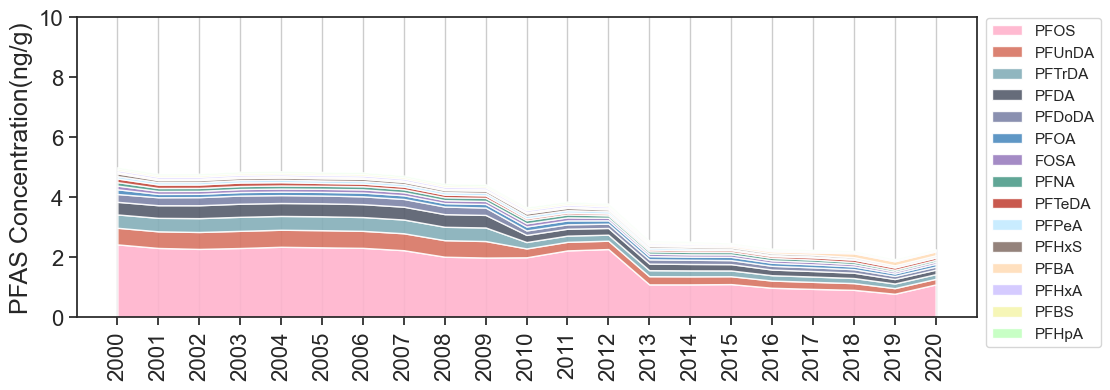

'okk'

In [18]:
draw_year_gpfas(df_merge_lr, path_ng_fig,'lr', 10)

### Map uncertainties

In [26]:

import os
import pandas as pd
from netCDF4 import Dataset
import numpy as np

def change_to_nc(path_final, path_data, data_type, str_colname='value'):
    name_new_file = f'{data_type}_year_{str_colname}.nc'
    df = pd.read_csv(path_data + data_type + '.csv')
    df = df[['lon_grid', 'lat_grid', str_colname]]
    nc_file = Dataset(path_final + name_new_file, 'w', format='NETCDF4')

    lon = np.arange(-180, 180, 1)
    lat = np.arange(-90, 90, 1)
    nc_file.createDimension('lon', len(lon))
    nc_file.createDimension('lat', len(lat))
    lon_var = nc_file.createVariable('lon', 'f4', 'lon')
    lat_var = nc_file.createVariable('lat', 'f4', 'lat')
    lon_var[:] = lon
    lat_var[:] = lat
    value_var = nc_file.createVariable(str_colname, 'f4', ('lat', 'lon'))
    value_data = np.full((len(lat), len(lon)), np.nan)
    for index, row in df.iterrows():
        if row['lon_grid'] != -180 and row['lon_grid'] != 180 and row['lat_grid'] != -90 and row['lat_grid'] != 90:
            value_data[int(row['lat_grid'] + 90), int(row['lon_grid'] + 180)] = row[str_colname]
    value_var[:, :] = value_data
    nc_file.close()
    return print('over')

In [27]:
path_final_sw = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/sw_forecast/s7_rf_output/final_file/'
path_data_sw = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/sw_forecast/s7_rf_output/only_pfas/'

change_to_nc(path_final_sw, path_data_sw, 'sw_value', 'value_cv')

over


In [28]:
path_final_lr = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/lr_forecast/s7_rf_output/final_file/'
path_data_lr = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/lr_forecast/s7_rf_output/only_pfas/'

change_to_nc(path_final_lr, path_data_lr, 'lr_value', 'value_cv')

over
